# Ejemplo de entrenamiento de una red neuronal MLP

Este es un ejemplo que entrena un modelo de red neuronal MLP para el conjunto de datos iris.cvs.

El conjunto de datos Iris contiene datos sobre tres tipos de flores Iris. Este es un conjunto de datos multi-variables construidos por Edgar Anderson para cuantificar la variación morfológica de tres especies de flores de iris.

El conjunto de datos contiene tres clases de flores que son: Iris Setosa, Iris Versicolour, e Iris Virginica. Cada clase cuenta con 50 ejemplos registrados, para un total de 150 ejemplos en el conjunto de datos. 

Los atributos, variables independientes, o características registrados para cada ejemplo son:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm

El conjunto de datos está disponible en: https://archive.ics.uci.edu/ml/datasets/Iris/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

Cargando el conjunto de datos de un archivo extensión .cvs, y mostrando información del archivo.

In [2]:
#Cargando datos
#No se le olvide actualizar este path a la ubicación del archivo de datos
heart = pd.read_csv("./heart.csv")
#Informacion de los datos
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Visualizando la distribución de las clases a través de un histograma.

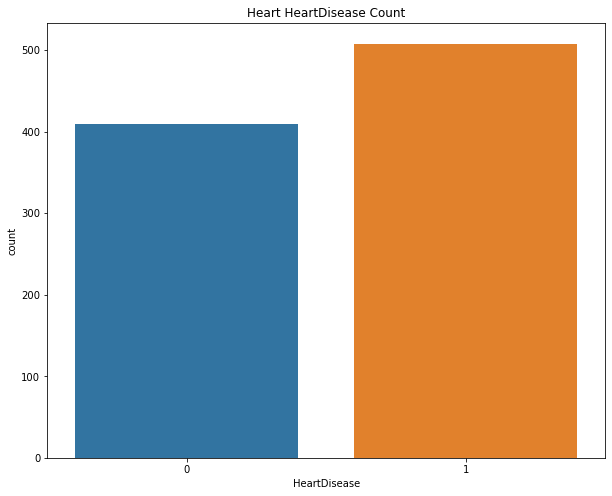

In [4]:
#Histograma del atributo clase
ax=plt.subplots(1,1,figsize=(10,8))
#sns.countplot('Species',data=iris)
sns.countplot(x='HeartDisease',data=heart)
plt.title("Heart HeartDisease Count")
plt.show()

Convirtiendo Variables Categoricas A Numericas 
Sex , ChestPainType , RestingECG , ExerciseAngina , ST_Slope . 
Teniendo en cuenta El orden Factorize , No orden onehotEncoding.

In [ ]:
heartclass = heart['Sex']
heartclass_econded, heartclass_categories = heartclass.factorize()
print(heartclass_econded)
print(heartclass_categories[:10])
heart['Sex'] = heartclass_econded
print(heart.info())


heartclass = heart['ChestPainType']
heartclass_econded, heartclass_categories = heartclass.factorize()
print(heartclass_econded)
print(heartclass_categories[:10])
heart['ChestPainType'] = heartclass_econded
print(heart.info())


heartclass = heart['RestingECG']
heartclass_econded, heartclass_categories = heartclass.factorize()
print(heartclass_econded)
print(heartclass_categories[:10])
heart['RestingECG'] = heartclass_econded
print(heart.info())


heartclass = heart['ExerciseAngina']
heartclass_econded, heartclass_categories = heartclass.factorize()
print(heartclass_econded)
print(heartclass_categories[:10])
heart['ExerciseAngina'] = heartclass_econded
print(heart.info())


heartclass = heart['ST_Slope']
heartclass_econded, heartclass_categories = heartclass.factorize()
print(heartclass_econded)
print(heartclass_categories[:10])
heart['ST_Slope'] = heartclass_econded
print(heart.info())








Visualizando los histogramas de cada atributo.

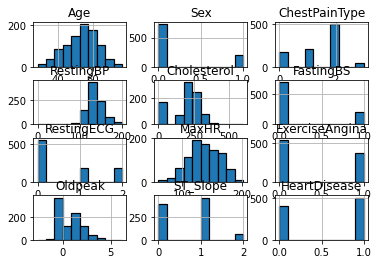

In [12]:
#Histograma de atributos predictores

heart.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
#fig.set_size_inches(12,12)
plt.show()

Diagrama de cajas de los atributos o variables independientes.

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              0        140          289          0           0   
1   49    1              1        160          180          0           0   
2   37    0              0        130          283          0           1   
3   48    1              2        138          214          0           0   
4   54    0              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  


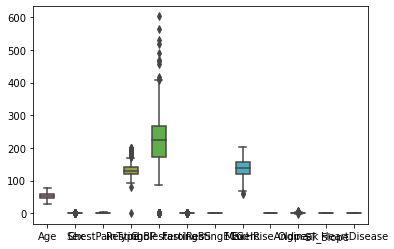

In [13]:
#boxplot de las variables numericas
box_data = heart #variable representing the data array
print(box_data.head())
box_target = heart.HeartDisease #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
#sns.set(rc={'figure.figsize':(2,15)})
plt.show()

Observando la correlación entre variables permite descubrir posibles dependencias entre las variables independientes.

                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000 -0.055750       0.214164   0.254399    -0.095282   
Sex            -0.055750  1.000000      -0.179766  -0.005133     0.200092   
ChestPainType   0.214164 -0.179766       1.000000   0.075332    -0.130997   
RestingBP       0.254399 -0.005133       0.075332   1.000000     0.100893   
Cholesterol    -0.095282  0.200092      -0.130997   0.100893     1.000000   
FastingBS       0.198039 -0.120076       0.155111   0.070193    -0.260974   
RestingECG      0.213152  0.018343       0.112067   0.097661     0.112095   
MaxHR          -0.382045  0.189186      -0.273076  -0.112135     0.235792   
ExerciseAngina  0.215793 -0.190664       0.324049   0.155101    -0.034166   
Oldpeak         0.258612 -0.105734       0.300846   0.164803     0.050148   
ST_Slope        0.268264 -0.150693       0.352364   0.075162    -0.111471   

                FastingBS  RestingECG     MaxHR  ExerciseAngina   Oldpeak  

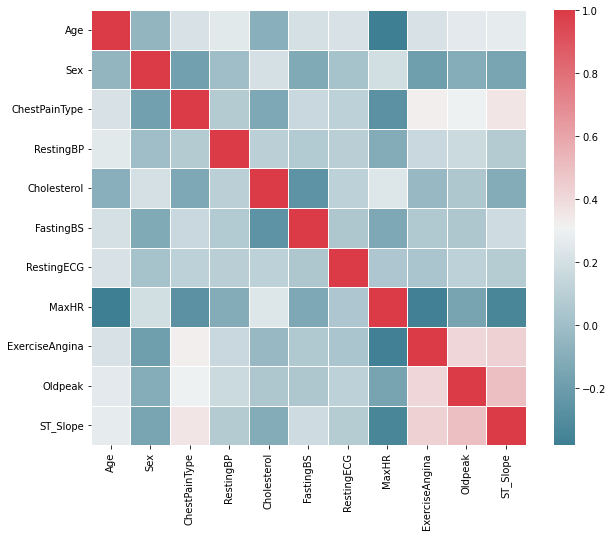

In [14]:
#observando correlacion entre variables
X = heart.iloc[:, 0:11]
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
print(corr)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
          cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, linewidths=.5,annot=True)
plt.show() 

En la matriz de correlación se observa un alto coeficiente para las variables petalWidth y PetalLength. Podemos mirar el comportamiento de las dos variables utilizando regresión lineal.

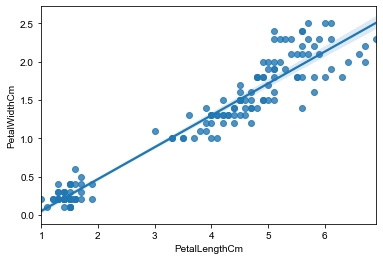

In [7]:
#observando relaciones entre los datos
sns.regplot(x='PetalLengthCm', y='PetalWidthCm', data=iris);
sns.set(rc={'figure.figsize':(2,5)})
plt.show()

Una vez observado y analizado las variables del conjunto de datos vamos a hacer una primera prueba preliminar para observar cómo se comportaría el modelo de red neuronal. La configuración de este primer modelo se indica a través de los parámetros de MPLClassifier

In [8]:
#Separando los datos en conjuntos de entrenaimiento y prueba
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#Como esta es una primera prueba prelimintar coloco esta instrucción para que nos me saque un warning
#debido a que el modelo no alcanza a converger
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

#Entrenando un modelo de red neuronal MLP para clasificación
#MLPClassifier permite configurar las capas ocultas del modelo, la instrucción de abajo indica que el modelo tendrá
#dos capas ocultas cada una con 3 neuronas. Algo como esto hidden_layer_sizes = (3,3,2) indicarían tres capas ocultas con
#3,3 y 2 neuronas respectivamente
model =  MLPClassifier(hidden_layer_sizes = (2,2), alpha=0.01, max_iter=1000) 
model.fit(X_train, y_train) #Training the model

MLPClassifier(alpha=0.01, hidden_layer_sizes=(2, 2), max_iter=1000)

Una vez entrenado el modelo, debemos evaluarlo sobre el conjunto de datos reservado para prueba, y utilizar algunas métricas para observar que tan bien quedo entrenado el modelo. En esta primera prueba utilizamos como métricas el porcentaje de precisión del modelo y la matriz de confusión.

In [9]:
#Test the model
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

0.9
Confusion matrix:
[[13  0  0]
 [ 0  5  3]
 [ 0  0  9]]


Ahora vamos a ajustar los parámetros del modelo utilizando GridSearch

In [10]:
param_grid = [{'hidden_layer_sizes' : [(3,3), (4,4), (5,4)], 'max_iter':[100, 500, 1000]}, 
              {'alpha': [0.0001, 0.001, 0.01, 0.1]}]

In [11]:
model = MLPClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'hidden_layer_sizes': [(3, 3), (4, 4), (5, 4)],
                          'max_iter': [100, 500, 1000]},
                         {'alpha': [0.0001, 0.001, 0.01, 0.1]}],
             scoring='accuracy')

In [12]:
print(grid_search.best_params_)

{'hidden_layer_sizes': (4, 4), 'max_iter': 1000}


In [13]:
predictions = grid_search.predict(X_test)
print(accuracy_score(y_test, predictions))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

0.9
Confusion matrix:
[[13  0  0]
 [ 0  5  3]
 [ 0  0  9]]


Ahora vamos a volver a crear un conjunto de entrenamiento y prueba para entrenar el modelo de red neuronal MLP para regresión. La configuración de la red, se especifica en los parámetros de MLPRegressor. Luego evaluamos el modelo entrenado y calculamos el error cuadrático medio, la cual es una métrica de error utilizada para regresión.

Vamos a convertir el atributo clase de variable categórica a numérica para aplicar MLPregression.

In [14]:
irisclass = iris['Species']
irisclass_econded, irisclass_categories = irisclass.factorize()
print(irisclass_econded)
print(irisclass_categories[:10])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [15]:
#Creando conjuntos de entrenamiento y prueba para regresión
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X, irisclass_econded, test_size=0.20)
model =  MLPRegressor(hidden_layer_sizes = (2,2), alpha=0.01, max_iter=1000) 
model.fit(X_train_R, y_train_R) #Training the model

MLPRegressor(alpha=0.01, hidden_layer_sizes=(2, 2), max_iter=1000)

In [16]:
#Test the model
predictions_R = model.predict(X_test_R)
print(mean_squared_error(y_test_R, predictions_R))

0.7621052747160227


Ahora ajustaremos los parámetros para la clase MLPRegressor y mostraremos los resultados obtenidos con lo mejores parámetros encontrados.

In [18]:
#Observe que son las mimas instrucciones utilizadas para la clase MLPClassifier
model2 = MLPRegressor()
grid_search2 = GridSearchCV(model2, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search2.fit(X_train_R, y_train_R)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid=[{'hidden_layer_sizes': [(3, 3), (4, 4), (5, 4)],
                          'max_iter': [100, 500, 1000]},
                         {'alpha': [0.0001, 0.001, 0.01, 0.1]}],
             scoring='neg_mean_squared_error')

In [19]:
print(grid_search2.best_params_) #Mejores parámetros encontrados para MLPRegressor

{'alpha': 0.01}


In [20]:
print(grid_search2.best_estimator_)

MLPRegressor(alpha=0.01)


Ahora vamos a graficar los resultados obtenidos. En la gráfica se podrá observar un plot de los datos original, de la aproximación obtenida con el primer modelo sin ajustar parámetros, y del modelo con los mejores parámetros encontrados por GridSearchCV.

Error cuadrático medio obtenido con los parámetros encontrados por GridSearchCV:
0.04278923559107934


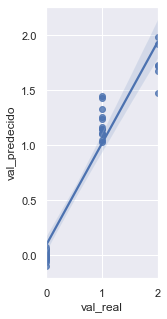

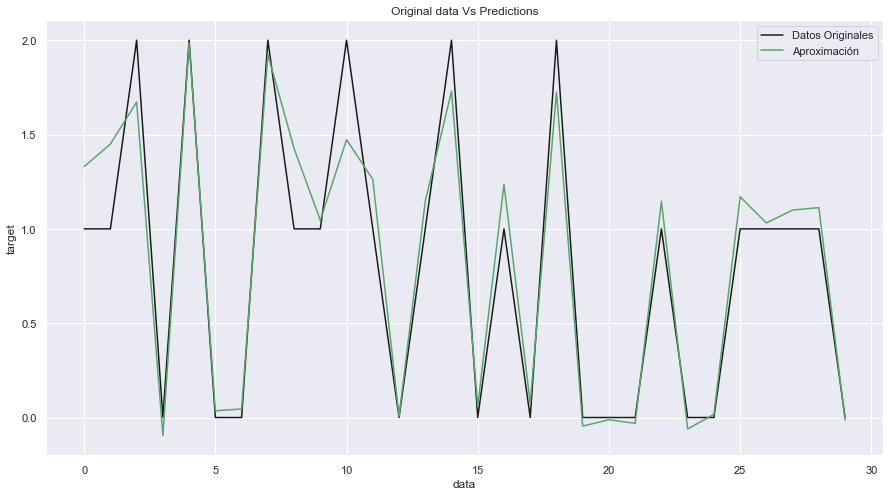

In [21]:
R_ind = grid_search2.best_estimator_  #
new_predictions_R = R_ind.predict(X_test_R) #Utilizamos los parámetros encontrados para volver 
print('Error cuadrático medio obtenido con los parámetros encontrados por GridSearchCV:')
print(mean_squared_error(y_test_R, new_predictions_R))

data_temp = pd.DataFrame(data=y_test_R, columns=['val_real'])
data_temp['val_predecido'] = pd.DataFrame(data=new_predictions_R)

sns.regplot(x='val_real', y='val_predecido', data=data_temp);
sns.set(rc={'figure.figsize':(15,8)})
plt.show()

X = np.arange(0, len(y_test_R))
plt.figure(figsize=(15,8))
plt.plot(X, y_test_R, 'k', label='Datos Originales')
plt.plot(X, new_predictions_R, 'g', label='Aproximación')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Original data Vs Predictions')
plt.legend()
plt.show()